In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

%matplotlib inline

set_matplotlib_formats('svg')
sns.set_style("whitegrid")

In [3]:
PATH = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"
df = pd.read_csv(PATH)
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. EDA 

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
#defining categorical features and numerical features
cat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
num = ["age","trtbps","chol","thalachh","oldpeak"]

## 1.2 Univariate Analysis

In [11]:
cat

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

- Univariate Visualizations for categorical features

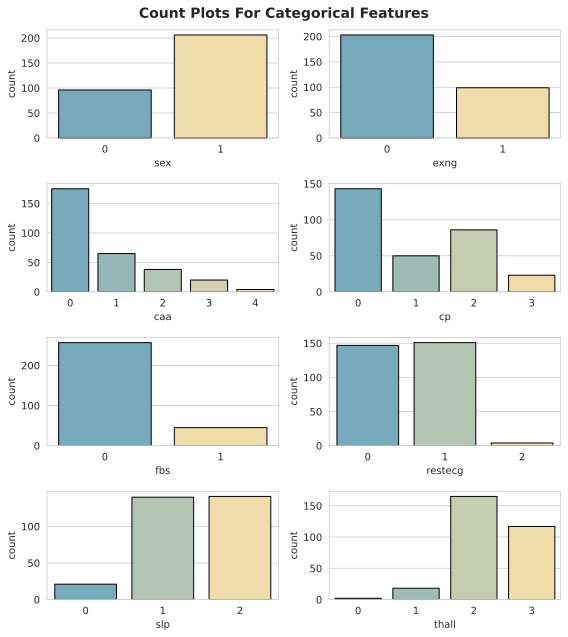

In [12]:
_, axes = plt.subplots(4, 2, figsize = (8,9))
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    cat_name = cat[i]
    sns.countplot(x = df[cat_name], ax = ax, alpha = 1, palette = 'blend:#7AB,#EDA', saturation =1, edgecolor='k', linewidth=1)
    i = i + 1
_.suptitle('Count Plots For Categorical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()


<AxesSubplot:xlabel='output', ylabel='count'>

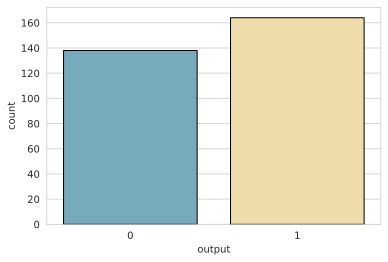

In [13]:
sns.countplot(x = df['output'],alpha = 1, palette = "blend:#7AB,#EDA", saturation =1, edgecolor='k', linewidth=1)


- Univariate Visualizations for numerical features

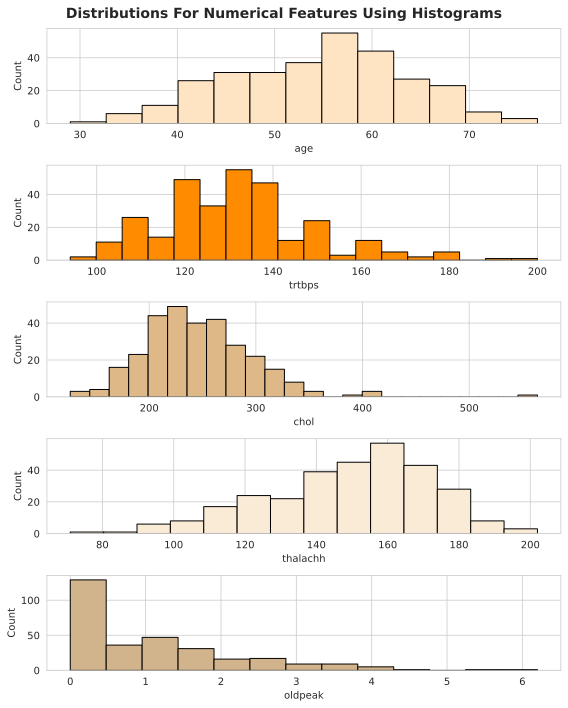

In [14]:
_, axes = plt.subplots(5, 1, figsize = (8,10))
axes = np.array(axes)
colors = ['bisque','darkorange','burlywood','antiquewhite','tan']
for i in range(len(axes.reshape(-1,1))):
    sns.histplot(df[num[i]], alpha = 1, color = colors[i],edgecolor='k', linewidth=1,  ax = axes[i])

_.suptitle('Distributions For Numerical Features Using Histograms' , fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

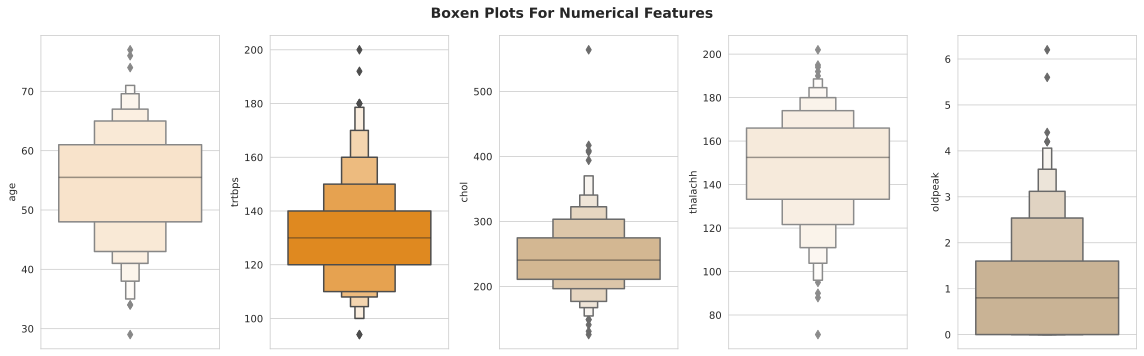

In [15]:
_, axes = plt.subplots(1, 5, figsize = (16,5))

axes = np.array(axes)
colors = ['bisque','darkorange','burlywood','antiquewhite','tan']
for i in range(len(axes.reshape(-1,1))):
    sns.boxenplot(y = df[num[i]], color = colors[i], ax = axes[i] )


_.suptitle('Boxen Plots For Numerical Features', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

## 1.3 Bivariate Analysis 

- Bivariate Visualizations

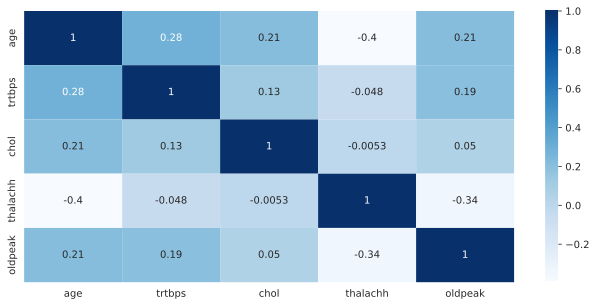

In [16]:
#heatmap for numerical features
plt.figure(figsize = (11,5))
sns.heatmap(df[num].corr(), annot = True, cmap = 'Blues')
plt.show()

- Output Feature Vs. Categorical Features

In [17]:
cat

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

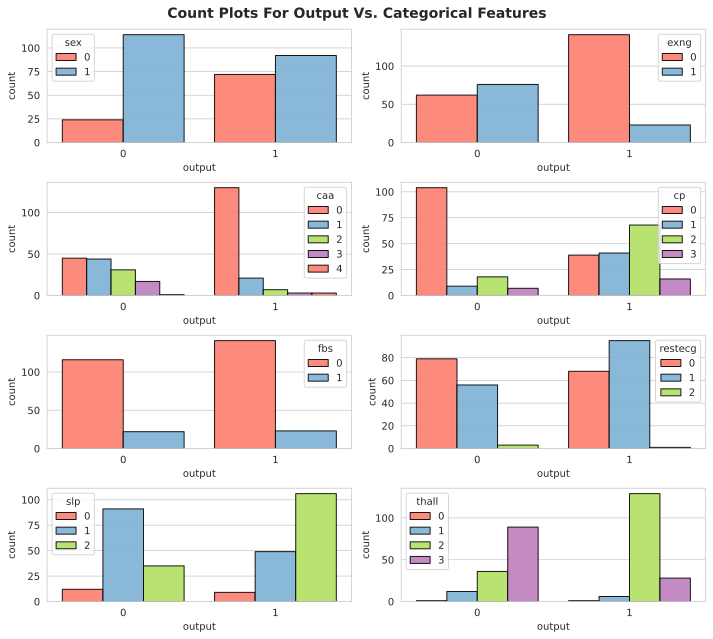

In [18]:
_, axes = plt.subplots(4, 2, figsize = (10,9), dpi = 80)
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    cat_name = cat[i]
    sns.countplot(x = df['output'] ,hue = df[cat_name] , ax = ax, alpha = 0.9, palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"], saturation =1, edgecolor='k', linewidth=1)
    i = i + 1
_.suptitle('Count Plots For Output Vs. Categorical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()


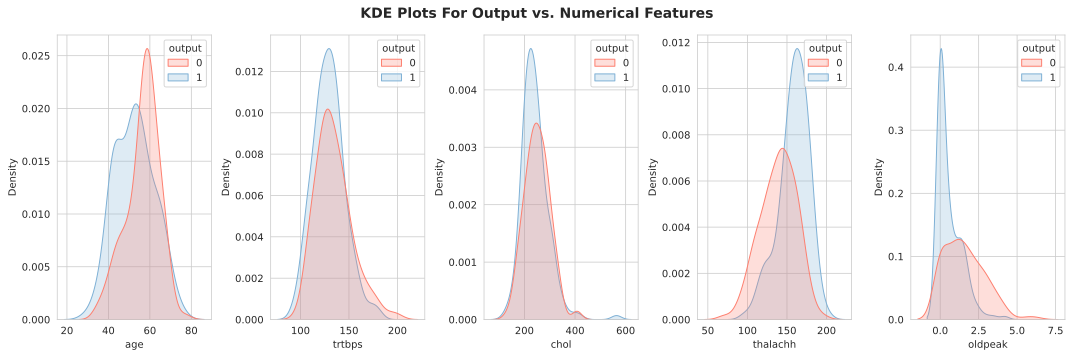

In [19]:
_, axes = plt.subplots(1, 5, figsize = (15,5), dpi = 80)
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    num1 = num[i]
    sns.kdeplot(data = df ,x=  df[num1], hue = 'output', fill = True, ax = ax, palette = ["#fd7f6f", "#7eb0d5"])
    i = i + 1
_.suptitle('KDE Plots For Output vs. Numerical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

In [20]:
["#ffb400", "#d2980d", "#a57c1b", "#786028", "#363445", "#48446e", "#5e569b", "#776bcd", "#9080ff"]

['#ffb400',
 '#d2980d',
 '#a57c1b',
 '#786028',
 '#363445',
 '#48446e',
 '#5e569b',
 '#776bcd',
 '#9080ff']

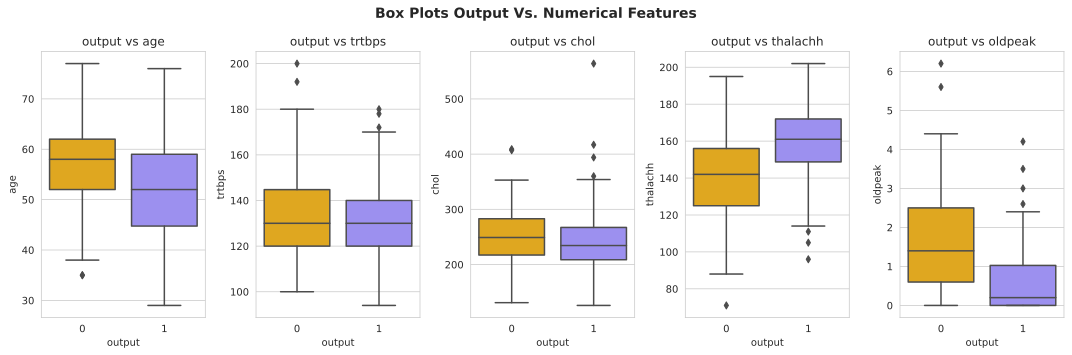

In [21]:
f, ax = plt.subplots(1,5 , figsize = (15,5))

for i in range(len(num)):
    sns.boxplot(x = 'output',y = num[i],  data =df, ax = ax[i] , palette = ['#ffb400','#9080ff'])
    ax[i].title.set_text('output vs {0}'.format(num[i]))
f.suptitle('Box Plots Output Vs. Numerical Features', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

In [22]:
df_pair = df.drop(cat, axis = 1)

Text(0.5, 1, 'Scatter Matrix For Output Vs. Numerical Features')

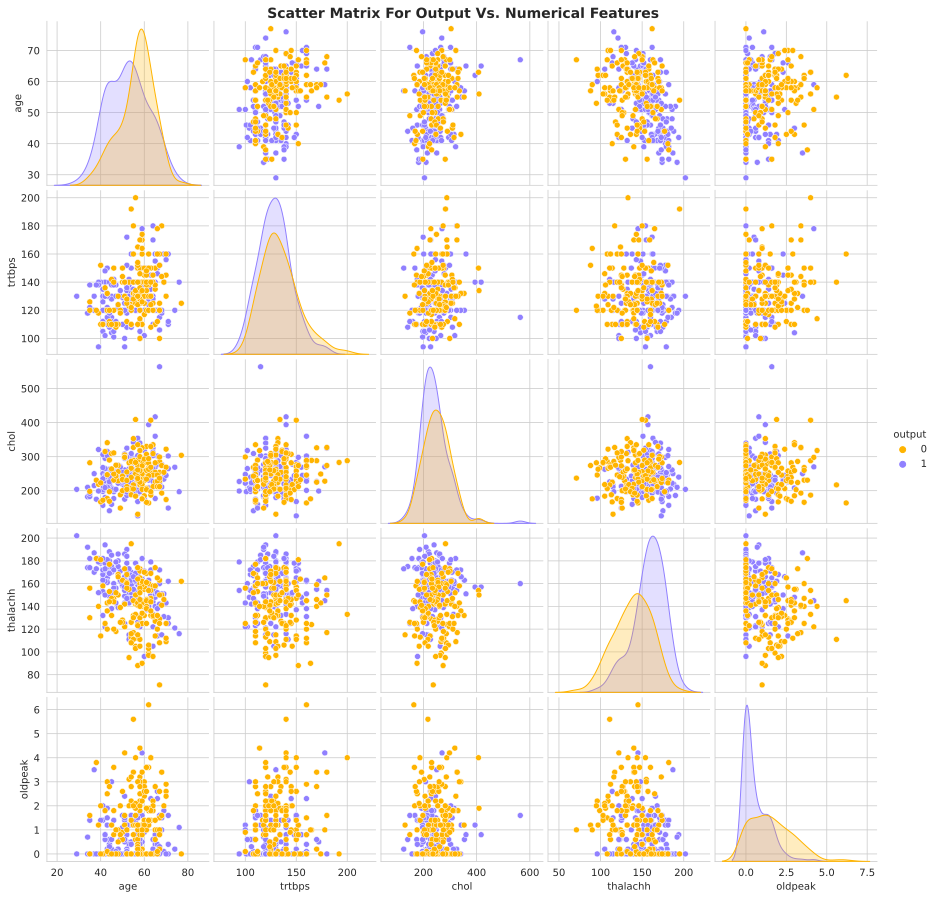

In [23]:
#plt.figure(figsize=(5,5))
['#ffb400','#9080ff']
f = sns.pairplot(df_pair, hue = 'output',diag_kind="kde",  palette = ['#ffb400','#9080ff'])
f.fig.suptitle('Scatter Matrix For Output Vs. Numerical Features',fontsize = 14, fontweight = 'heavy',  y = 1 )

## Conclusions From EDA:

- Dataset has a shape of 303 rows and 14 columns
- Dataset doesn't have NaN values
- From count plot for categorical features:
     1. "sex" feature class 1 higher than class 0
     2. "cp" feature class 0 is the highest over different values
     3. "fbs" feature class 0 around 85%
     4. "exng" feature is class 0 
     5. "output" feature is Balanced
- From boxen plots for numerical features, we see many outliers
- From Heatmap correlation for numerical features there is no linear correlation between numerical features
- We can get more conclusions from "output vs categorical features" and "output vs numerical features"

# 2. Data Preprocessing & Modeling

In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC

In [25]:
cat

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

In [26]:
num

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [27]:
'''
drop_first=True is important to use, 
as it helps in reducing the extra column created during dummy variable creation. 
Hence it reduces the correlations created among dummy variables.

Source: Stackoverflow


scale features using statistics that are robust to outliers. 
This Scaler removes the median and scales the data according to the quantile range

Source:
'''
df_1 = pd.get_dummies(df, columns = cat, drop_first = True)
X = df_1.drop('output', axis = 1)
y = df_1['output']
scaler = RobustScaler()
X[num] = scaler.fit_transform(X[num])

In [28]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X:  (302, 22)
Shape of y:  (302,)
Shape of x_train:  (211, 22)
Shape of x_test:  (91, 22)
Shape of y_train:  (211,)
Shape of y_test:  (91,)


In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.8791208791208791

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.90      0.88      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [34]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        42
           1       0.91      0.80      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [36]:
X = df.drop('output', axis = 1)
y = df['output']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8021978021978022

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.83      0.80      0.81        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



# END
### Not finished
1. Didn't make a Hyperparamter Tunning
2. May try different algorithms